# **Analyzing Death Age Differences between Left-handed and Right-handed People**

*Varad V. Deshmukh*

> ### The Handedness - Age divide : Where are the old left-handers?

**Importing libraries**

We import `numpy`, `pandas` and `Matplotlib`, the well-known Python libraries for data analysis with their conventional aliases as `np`, `pd` and `plt` *(for the pyplot module within Matplotlib)* respectively.

In [19]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Read the dataset**

Next, we load the dataset which tabulates the rates of left-handedness which is sourced from the 1992 paper by Gilbert and Wysocky into a `pandas` `DataFrame` object. The DataFrame `lefthanded_data` will thus have three columns - age and rates of left-handedness for males and females.

In [20]:
# load the data
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

# visualise the DataFrame
lefthanded_data.head()

,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906


**Plot male and female handedness data**

Next, we plot both the male and female left-handedness rates on a single plot with age on the x-axis and the rate of left-handedness on the y-axis. This gives us two different line charts on the same plot, formatted with different aesthetics, to make comparison of rates easier across age categories and gender.

Text(0, 0.5, 'Left-handedness')

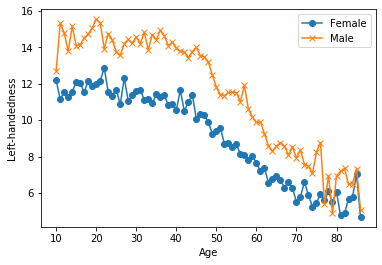

In [21]:
# plot male and female left-handedness rates vs. age
%matplotlib inline
fig, ax = plt.subplots() # create figure and axis objects
ax.plot('Age', 'Female', data = lefthanded_data, marker = 'o') # plot "Female" vs. "Age"
ax.plot('Age', 'Male', data = lefthanded_data, marker = 'x') # plot "Male" vs. "Age"
ax.legend() # add a legend
ax.set_xlabel('Age')
ax.set_ylabel('Left-handedness')

**What does the plot say?**

The above output plot clearly shows that for both males and females, rates of left-handedness gradually decrease over age. Thus, the phenomenon of diminishing rates of left-handedness is gender-independent, although the absolute rates for males have been historically greater than females, for reasons unknown, at least to us. Though, this difference patches up towards the golden years of respondents, i.e. towards the end of their lives.

> ### Left-handedness : Concerns with social acceptability 

Gilbert and Wysocki in their seminal publication of 1992 had concluded that the age-dependence of left-handedness was primarily because of the changing social acceptability of left-handedness. This implied that the rates weren’t a factor of age per se but rather of the year of birth of the person in question who is being studied (hereinafter referred to as ‘the person’). This signifies a changing societal outlook towards people being left-handed.

**Making a new column for the birth year**

So, rather than using the column for age as given in the dataset, a new column was inserted for the birth year of the person by subtracting the age from 1986, which is the year of data collection, thus giving the birth year of the person. This corroborates with the discussion above of the rates being a factor of the year of birth rather than the age of the person.

In [22]:
# create a new column for birth year of each age
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']

**Average rate of left-handedness**

Next, we calculate a mean rate of left-handedness for both sexes, for each year of birth of study. This will inculcate any differences in rates of left- handedness by virtue of gender and give us a credible estimate of the rate of left-handedness for each birth year of study. This result is stored in a new column named `Mean_lh`.

In [23]:
# create a new column for the average rate of male and female left-handedness
lefthanded_data['Mean_lh'] = lefthanded_data[['Female', 'Male']].mean(axis = 1)

**Plot the average left-handedness rate vs. birth year**

Now, we plot the mean rate that we just calculated against birth year to see the temporal variation of the rates of left-handedness over the time period in question, as to how average left-handedness varies over time. This plot depicts that rates of left-handedness were around 13% for people younger than 40 years of age but decreased with age to about 5% by the age of 80, just as Gilbert and Wysocki had inferred. This is a clear indication of the idea that with time and as people age, left-handedness is less prevalent.

Text(0, 0.5, 'Average Left-handedness')

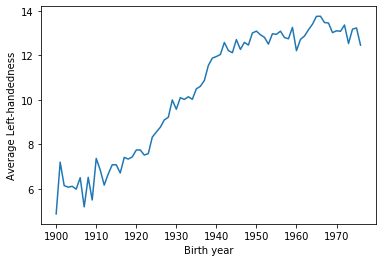

In [24]:
# create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig, ax = plt.subplots()
ax.plot('Birth_year', 'Mean_lh', data = lefthanded_data) # plot 'Mean_lh' vs. 'Birth_year'
ax.set_xlabel('Birth year') # set the x label for the plot
ax.set_ylabel('Average Left-handedness') # set the y label for the plot

**What does the plot say?**

The above output plot corroborates the observation that left-handedness is reported in a diminishing fashion as people get older, or rather for people with earlier birth years. This is why the plot rises with birth years on the x-axis.

> ### Bayesian Statistics

We want to calculate the probability of a left-handed person dying at a certain age, say A, then we will calculate the corresponding quantity for a right- handed person. This is a perfect example of the application of the concept of conditional probability, wherein we find the probability that an event occurs given the knowledge that another event has occurred. In conditional probability, the outcomes of a certain experiment are essentially dependent on the outcomes of another experiment.

In probability theory and statistics, Bayes’ Theorem / Rule describes this conditional probability. The basic mathematical formulation for Bayes’ Theorem is :
$$P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}$$

where,

(i) $P(X|Y)$ = probability that event X occurs given that event Y has already occurred

(ii) $P(Y|X)$ = probability of occurrence of event Y given event X has already occurred

(iii) $P(X)$ and $P(Y)$ are the respective probabilities of occurrence of events X and Y, separately, without any conditions

Here, we want to find out the probability of a person dying at age A, given that he is left-handed. Thus, in our case, event X is the person dying at age A and event Y is the person being left-handed. So we write the Bayes’ rule for our example as -

$$ P(A|LH) = \frac{P(LH|A)P(A)}{P(LH)}$$

where,

* $P(A|LH)$ = probability that a left-handed person dies at age A
* $P(LH|A)$ = probability that the person who dies at age A was left-handed
* $P(A)$ and $P(LH)$ are the respective probabilities of a person dying at age A and being left-handed, separately, without conditions

For calculating $P(A|LH)$, we need to calculate the three quantities on the right-hand side of the above equation, which we do next.

**Calculate $P(LH|A)$**

For this purpose, we create a custom function named `P_lh_given_A`, which takes two parameters as the `ages_of_death`, which is a NumPy array of ages of death of the people, which we take from the death distribution data and `study_year` which has 1990 as the default value. So, all in all, the function `P_lh_given_A` calculates the probability that the person who died in `study_year` at age `ages_of_death` will be left-handed.

To calculate the function for ages that might fall outside the year range of the original data, we would need to extrapolate the data for years earlier and later than the range. We calculate the mean rates of left-handedness for both the early 1900s and late 1900s, as the average rate for the last 10 and first 10 rows, i.e years 1900 to 1909 for rates for the early 1900s and years 1967 to 1976 for rates for the late 1900s. Mean rates for the mid-1900s are calculated using data from a certain range of ages according to the `study_year` and the `ages_of_death` values. The youngest age of death in our data is 10 and the oldest is 86, we store them in respective variables.

Next, we instantiate a NumPy array consisting of all zeros, of shape *(i.e. number of rows x number of columns)* the same as the `ages_of_death` input data and then fill the array with the corresponding rates of left-handedness at the appropriate places according to the logic as follows -

(a) age of death > oldest age => average rate for early-1900s

(b) age of death < youngest age => average rate for late-1900s

(c) age of death in range [youngest age, oldest age] => average rate for mid-1900s

The function `P_lh_given_A` thus returns the above array, filled with the appropriate rates of left-handedness.

In [25]:
# create a function for P(LH|A)
def P_lh_given_A(ages_of_death, study_year = 1990):

    """
    calculates P(LH|A), based on the reported rates of left-handedness.
    Inputs : numpy array of ages of death, study_year
    Returns : probability of left-handedness given that subjects died in `study_year` at ages `ages_of_death`
    """
    
    # Use the mean of the 10 last and 10 first points for left-handedness rates before and after the start 
    early_1900s_rate = lefthanded_data['Mean_lh'].tail(10).mean()
    late_1900s_rate = lefthanded_data['Mean_lh'].head(10).mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year-ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10 # the youngest age is 10
    oldest_age = study_year - 1986 + 86 # the oldest age is 86
    P_return = np.zeros(ages_of_death.shape) # create an empty array to store the results
    
    # extract rate of left-handedness for people of ages 'ages_of_death'
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates/100
    
    return P_return

> ### The Death Distribution Data

In order to create a probability distribution function for the people dying as a function of their ages at the time of death, we use the US data for death for the year 1999. The data includes the number of deaths for both male and female as well as both sexes together, for different ages. We load the death distribution data into a pandas DataFrame, with the defined separator as a tab and skipping the first row, because the first row in the raw data has the total number of deaths recorded for the whole year, so we do not include the first row in our analysis.

In [26]:
# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

# load death distribution data
death_distribution_data = pd.read_csv(data_url_2, sep = '\t', skiprows = [1])

**Data Cleaning**

The raw data as downloaded is not clean. So we clean the data by dropping the `NaN` values, which is a standard missing data marker in pandas and NumPy, from the ‘Both Sexes’ column, i.e. the rows where the ‘Both Sexes’ column has `NaN` values, are dropped altogether. We adopt the approach of dropping the missing data rows because the refined and cleaned data does not affect data integrity much and we do not incur any substantial loss of information. We use the `pd.dropna()` method of the `DataFrame` object, and specify two parameters - `subset` - the column which is to be checked for missing values, and `inplace` - which if set to a boolean `True`, cleans the original `DataFrame`, rather than returning a new copy of the cleaned data.

In [27]:
# drop NaN values from the `Both Sexes` column
death_distribution_data.dropna(subset = ['Both Sexes'], inplace = True)

**Plot the death distribution data**

We then plot the cleaned death distribution data, with age of death on the x-axis, and the number of people who died on the y-axis.

Text(0, 0.5, 'No. of people who died')

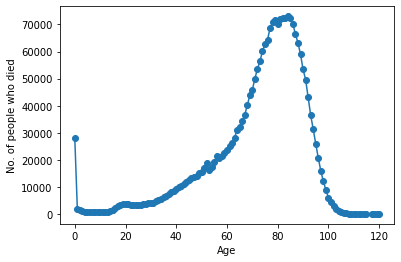

In [28]:
# plot number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data, marker='o') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Age') 
ax.set_ylabel('No. of people who died')

**What does the plot say?**

This plot shows that the death plot shows a maximum at an age of around 80 years, with the plot tapering off on both sides. The data also shows another peak at age around 0 years, which is a bit spurious because this peak might imply that many new- born infants had died or the data might be an outlier as well. We are not in a position to judge what the actual case is based on the data that we have. This is
$P(A)$, which is the second quantity we wanted to calculate, i.e. the probability of people dying at age A.

> ### The probability of left-handedness

We now proceed to calculate the third quantity P(L H ), which is the probability that a person who died in a particular study year was left-handed. This probability is not conditional. For this, we sum up the probabilities of left- handedness for all study years, weighted by the number of deceased people at that respective age, divided by the total number of deceased people at all ages. This gives us the required probability of a dying person being left-handed. Thus, mathematically,

$$P(LH) = \frac{\Sigma_{A}P(LH|A) \cdot N(A)}{\Sigma_{A}N(A)}$$

where,

* $P(LH)$ = probability of a person dying at a study year being left-handed
* $P(LH|A)$ = probability of person dying at age A being left-handed
* $N(A)$ = total number of deaths in a particular study year

**Calculating $P(LH)$**

For this, we define a custom function named `P_lh`, which takes the death distribution data and study year as inputs, with the latter having a default value 1990. The function is a simple algebraic calculation, with the ‘Both Sexes’ column from the death distribution data being used for the quantity $N(A)$, and the function `P_lh_given_A` that we defined in an earlier code block for the quantity $P(LH|A)$. This function gives a single floating point value as the output, which is the third required quantity $P(LH)$.

In [29]:
# creating a function for P(LH)
def P_lh(death_distribution_data, study_year = 1990): # sum over P_lh for each age group

    """
    Overall probability of being left-handed if you died in the study year
    Input: dataframe of death distribution data, study year
    Output: P(LH), a single floating point number
    """
    
    # multiply number of dead people by P_lh_given_A
    p_list = death_distribution_data['Both Sexes'] * P_lh_given_A(death_distribution_data['Age'], study_year)

    # calculate the sum of p_list
    p = np.sum(p_list)
    
    # normalize to total number of people (sum of death_distribution_data['Both Sexes'])
    return p / np.sum(death_distribution_data['Both Sexes']) 

print(P_lh(death_distribution_data))

0.07766387615350638


> ### The Final Calculations

Now that we have calculated all the three required quantities $P(LH|A)$, $P(A)$ and $P(LH)$, we combine them to put to work the Bayesian principle which we discussed above. The Bayes’ rule will give us the quantity $P(A|LH)$, which is the probability that a left-handed person dies at age A. To have a comparative perspective, we will compare $P(A|LH)$ with $P(A|RH)$, which is the probability of a right-handed person dying at age A. Thus, we calculate two quantities -
$$P(A|LH) = \frac{P(LH|A)P(A)}{P(LH)}$$
and
$$P(A|RH) = \frac{P(RH|A)P(A)}{P(RH)}$$

**Calculating $P(A|LH)$**

The former of the above two quantities is what we have discussed about previously. For calculating it, we define yet another custom function named `P_A_given_lh`, which takes in three input parameters, the `ages_of_death`, DataFrame `death_distribution_data` and `study_year` (with default value 1990).

In [30]:
# calculating P(A|LH)
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):

    """
    The overall probability of being a particular `age_of_death` given that you're left-handed
    """
    
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    
    # use P_lh function to get probability of left-handedness overall
    P_left = P_lh(death_distribution_data, study_year) 
    
    # use P_lh_given_A to get probability of left-handedness for a certain age
    P_lh_A = P_lh_given_A(ages_of_death, study_year) 
    
    return P_lh_A*P_A/P_left

**Calculating $P(A|RH)$**

We will calculate the second quantity using a simple probability principle which says that if the probability of an event $A$ is
say $p$, the probability of event $A$ ‘not occurring’ is $1 − p$ . We employ the same concept for calculating the second quantity we need, i.e. $P(A|RH)$ . A person is either left-handed or right-handed, this implies that their probabilities would sum to 1. Thus we use the following relations,

$$P(RH|A) = 1 - P(LH|A)$$
and
$$P(RH) = 1 - P(LH)$$

Thus, we calculate $P(A|RH)$ by defining yet another custom function `P_A_given_rh`, which uses the above relations.

In [31]:
# calculating P(A|RH)
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    
    """
    The overall probability of being a particular `age_of_death` given that you're right-handed
    """
    
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    
    # either you're left-handed or right-handed, so P_right = 1 - P_left
    P_right = 1 - P_lh(death_distribution_data, study_year) 
    
    # P_rh_A = 1 - P_lh_A 
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year) 
    
    return P_rh_A*P_A/P_right

> ### Plotting the conditional probabilities

Now having been calculated the quantities $P(A|LH)$ and $P(A|RH)$, which, to summarise, are the probabilities of a person dying at age A, she/he being left-handed and right-handed respectively, we move forward to plot these. We choose as the age range for which we want to study the probabilities as being from 6 to 120, which includes a wide range of plausible longevity for an average person. We use the NumPy `arange()` function for this purpose. Next, we calculate the required probabilities of a person dying at age A, being left or right-handed, i.e. the quantities $P(A|LH)$ and $P(A|RH)$, for which we have defined custom functions in previous code blocks. Having calculated them and storing them in appropriate variables `left_handed_probability` and `right_handed_probability`, we proceed to plot them, on a single plot so as to have a comparative perspective, with the probabilities on the y-axis, and ages of death on the x-axis.

Text(0, 0.5, 'Probability of being age A at death')

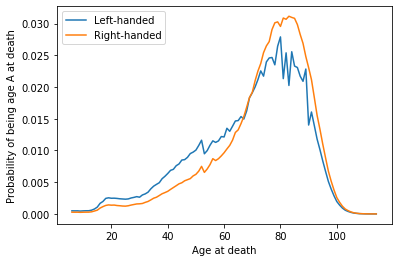

In [32]:
ages = np.arange(6, 115, 1) # make a list of ages of death to plot

# calculate the probability of being left- or right-handed for each 
left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

# create a plot of the two probabilities vs. age
fig, ax = plt.subplots()
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handed")
ax.legend()
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

> ### Inferences

Having plotted our data, we now proceed to compare our results with the original study as presented in the paper by Gilbert and Wysocki in 1992. The original study had concluded that there was a gap of 9 years in the average ages of death between right and left-handers, i.e. left-handed people were 9 years younger at death on average, than right-handed people. This means that left-handed people die younger, early than right-handed people. In order to derive a corresponding value from our analysis, we calculate the mean of the probability distributions that we calculate in the last code block, i.e. the variables `left_handed_probability` and `right_handed_probability`, weighted with age of death for each respective study year. For this we employ the `np.nansum()` function, which treats the `NaN` values *(which our data is replete with)* as zero, thus not affecting the sum. Mathematically, we intend to calculate -

Average age of left-handed people at death = $\Sigma_{A} A \cdot P(A|LH)$ and

Average age of right-handed people at death = $\Sigma_{A} A \cdot P(A|RH)$

This operation gives us two floating point values, the average age of death for left-handed people and the average age of death for right-handed people. When we calculate their difference, we find indeed that left-handed people die younger than right-handed people, at least this is what out data says ! *(though the difference value is smaller than the original study by Gilbert and Wysocki)*

In [33]:
# calculate average ages for left-handed and right-handed groups

# use np.array so that two arrays can be multiplied
average_lh_age =  np.nansum(ages * np.array(left_handed_probability))
average_rh_age =  np.nansum(ages * np.array(right_handed_probability))

# print the average ages for each group
print('Average age death of left-handed people : ' + str(average_lh_age))
print('Average age death of right-handed people : ' + str(average_rh_age))

# print the difference between the average ages
print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 2)) + " years.")

Average age death of left-handed people : 67.24503662801027
Average age death of right-handed people : 72.79171936526477
The difference in average ages is 5.55 years.


We now calculate the difference in average age of deaths for right- handers and left-handers, with the `study_year` parameter being set to 2018 instead of 1990. This means we are trying to apply our model to a hypothetical study of similar sort being carried out in the year 2018. We repeat all the above steps, in order, which we followed for the previous `study_year` of 1990 and find out the difference in average ages of deaths for right-handers and left- handers.

In [34]:
# Calculate the probability of being left- or right-handed for all ages
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, 2018)

# calculate average ages for left-handed and right-handed groups
average_lh_age_2018 = np.nansum(ages * np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages * np.array(right_handed_probability_2018))

print("The difference in average ages is " + 
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The difference in average ages is 2.3 years.


**What does the analysis say?**

As we see, the age difference turns out to be much smaller than the previous case. One of the reasons behind this could be that the rates of left- handedness haven't increased for people born after about 1960, corroborating with our earlier observations that reported left-handedness is constantly on decline. The said survey by National Geographic and the research by Gilbert and Wysocki both happened at a time when the rates of left-handedness had been changing across the lifetimes of most people alive, and the difference in handedness between old and young was at its most striking. This was not the case in our current `study_year` of 2018, thus the reduced age difference. Moreover, the death distribution data which we have been relying on is collated about a decade late than the handedness data, in 1999 instead of 1991. Also, it included death data for the entire US, rather than California alone, which was the target study population for Gilbert and Wysocki. These subtle differences along with the methodology of extrapolation which we employed to approximate the average rates for populations outside the range might have resulted in a distorted calculation, thus accentuating the decreasing age difference. To put it in a nutshell, we get a shifted version of the distribution upon changing the `study_year` parameter.

> ### Conclusion : What do we have to say?

Even as we changed the `study_year` parameter, nonetheless, we got a difference between the average age of death of right-handers and left- handers, so there must be something that accentuates the difference. Studies [5] on the apparent correlation between handedness and longevity suggested that this difference in longevity is consistent based on implied pathological factors and environmental interactions, as articulated by Halpern and Coren in 1991. They inferred that left-handers being at a greater risk of death at any given age was true, but this did not essentially meant that using one’s left-hand causes a risk of earlier death. Thus we cannot postulate that being left-handed alone was the cause of less life expectancy and longevity. It is likely that the correlates of sinistrality, not sinistrality itself, are responsible for the increased risk [1]. Left-handedness may be the cause of some specialities that may result in increased risk of life. Left-handedness is more prevalent in groups of people at high risk of life, say those with immune deficiencies or frequent accident- related injuries. As an example, the data on the cause of death for a certain sample of people was analysed separately for accidental and medical causes, which showed that indeed left-handers were more susceptible to accident- related injuries than right-handers. Thus, significantly more left-handed people died in accidents than right-handed people, thus reducing longevity. Moreover, left-handed people were more likely to die of injuries sustained in accidents while performing regular tasks like driving a vehicle [1].

Getting an age difference in the average ages of deaths for right-handed and left-handed people based purely on the premise of changing rates of left- handedness in the study population is indeed a harbinger of good news for the left-handers, because this implies that the decreased longevity is not solely the effect of sinistrality. Data has revealed that the reported rates of left- handedness have gradually gone down with ageing population, so it is pretty obvious that any random sample of the population at study nearing their golden years would have a predominance of right-handers over left-handers, giving the impression that right-handers live more than left-handers. Just because there are less left-handers than right-handers in the ageing population does not mean that they live less. Thus data has saved the day for us, in clearing the air over the mysterious phenomenon of an apparent handedness-longevity causation effect.

> ### References

1. Coren S, Halpern DF. Left-handedness: a marker for decreased survival fitness. Psychol Bull. 1991 Jan;109(:90-106. doi: 10.1037/0033-2909.109.1.90. PMID: 2006231.
2. Gilbert AN, Wysocki CJ. Hand preference and age in the United States. Neuropsychologia. 1992 Jul;30):601-8. doi: 10.1016/0028-3932(92)90065-t. PMID: 1528408.
3. Mcmanus, Ian. (2009). The history and geography of human handedness. Language Lateralization and Psychosis. 10.1017/CBO9780511576744.004.
4. Aggleton JP, Kentridge RW, Neave NJ. Evidence for longevity differences between left handed and right handed men: an archival study of cricketers. J Epidemiol Community Health. 1993 Jun47:206-9. doi: 10.1136/jech.47.3.206. PMID: 8350033; PMCID: PMC1059767.
5. Ferres, J.L., Nasir, M., Bijral, A. et al. Modelling to explore and challenge inherent assumptions when cultural norms have changed: a case study on left-handedness and life expectancy. Arch Public Health 81, 137 (2023). https:// doi.org/10.1186/s13690-023-01156-6